#### Separate project

In [65]:
# Calling libraries:
from __future__ import division
%matplotlib inline
import numpy as np, time, matplotlib.pyplot as plt, math, pandas, numpy.random as npr
from pylab import plot, show, legend
from time import time
from tqdm import trange
from scipy import integrate
from scipy.stats import *

In [17]:
A = np.ones((2,1))
P = A*np.linalg.inv(np.matmul(A.transpose(),A))*(A.transpose())

In [39]:
d = 2
theta0 = np.zeros(2)
n = 10**3
X = npr.randn(n,2) + theta0
Xbar = np.mean(X,0)

In [26]:
I = np.eye(2)
Lambda0 = np.reshape([[1, 0.3], [0.3, 1]], (2,2))

In [48]:
Lambdastr = Lambda0 + n*I
thetastr = np.matmul(np.linalg.inv(Lambdastr), np.matmul(Lambda0,np.reshape(theta0,(2,1))) + np.reshape(n*Xbar, (2,1)))

In [49]:
thetastr

array([[ 0.03312007],
       [-0.08040601]])

In [50]:
thetatd = np.reshape([0,0], (2,1))

In [51]:
thetatd.transpose()

array([[0, 0]])

In [81]:
def f(td) :
    thetatd = td*np.ones((2,1))
    return -1/2*((1/np.matmul(np.matmul(P.transpose(),np.linalg.inv(Lambdastr)), P)[0,0] - n)*thetatd[0]**2 \
    -2*np.matmul(thetatd.transpose(),(np.matmul(np.matmul(np.matmul(P.transpose(),np.linalg.inv(Lambdastr)), P), thetastr) \
                                      - np.reshape(n*Xbar, (2,1)))))
f = np.vectorize(f)

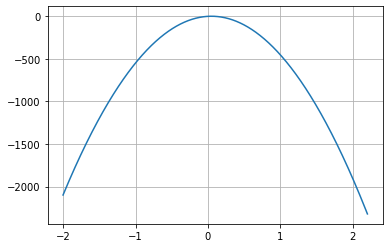

In [87]:
xvals = np.linspace(-2,2.2,1000)
plt.plot(xvals,f(xvals))
plt.grid(True)

In [23]:
np.shape(X)

(10000, 2)

In [ ]:
x0 = 0
eps = 1e-5

n = 10**5
theta = np.zeros(2)
Sigma = np.eye(2)
Sigma_inv = np.linalg.inv(Sigma)

mu0 = np.zeros((2,1))
Sigma0 = np.eye(2)
Sigma0_inv = np.linalg.inv(Sigma0)

In [71]:
rep = 100
val = np.zeros(rep)

for r in trange(rep) :
    X = npr.multivariate_normal(theta, Sigma, n)
    Xbar = np.reshape(np.mean(X,0), [2,1])

    Sigma_post = np.linalg.inv(Sigma0_inv + n*Sigma_inv) 
    mu_post = np.matmul(Sigma_post, (np.matmul(Sigma0_inv, mu0) + n*np.matmul(Sigma_inv,Xbar)))
    Sigma_post_inv = np.linalg.inv(Sigma_post)
    
    a, b, d = Sigma_post_inv[0,0], Sigma_post_inv[0,1], Sigma_post_inv[1,1]
    mux, muy = mu_post[0][0], mu_post[1][0]

    def f(x, y):
        return np.exp(-( (a+b)*(x-mux)**2 + (b+d)*(y-muy)**2 + (a+2*b+d)*(x-mux)*(y-muy)) )

    def bounds_y():
        return [-np.inf, np.inf]

    def bounds_x(y):
        return [x0 - eps/(2**1.5) - y, x0 + eps/(2**1.5) + y]

    val[r] = integrate.nquad(f, [bounds_x, bounds_y])[0]

100%|██████████| 100/100 [03:07<00:00,  2.00s/it]


In [72]:
val

array([ 0.0443745 ,  0.04168105,  0.02546684,  0.02635776, -0.03865749,
        0.06456079,  0.04871713,  0.00826637,  0.05051744, -0.02383875,
        0.03917883,  0.00355187,  0.03787824, -0.00680805, -0.05958694,
        0.00579831, -0.00340255, -0.01846829, -0.02753539,  0.04686863,
        0.01858167,  0.0034202 ,  0.04451024,  0.03283876,  0.04509993,
        0.03774679, -0.05902058, -0.03705677, -0.03365332, -0.05117399,
        0.048639  , -0.02943512,  0.0397204 , -0.03640145,  0.01414423,
        0.01277261, -0.02959109, -0.01239404,  0.00934016, -0.0452335 ,
        0.05654501, -0.03542475,  0.0007286 , -0.01785254,  0.03163051,
        0.03722428, -0.05428167,  0.03424086,  0.05262049,  0.00351854,
        0.04294152,  0.05527389, -0.05155361,  0.06360364, -0.01300597,
       -0.02283199, -0.02759294,  0.04607709,  0.01745962,  0.04926478,
        0.0237242 , -0.02751521, -0.04420103,  0.04188471, -0.0288488 ,
        0.05342546, -0.07092104, -0.04525549, -0.02228019, -0.05

In [73]:
np.mean(val)

0.0029322471447937883